In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
# read the path of data

file_path = r'C:\Users\Admin\Downloads\yahoo Finanace_industry - Stock Market.csv'
data = pd.read_csv(file_path)
print(data.head())

   Symbol                     Name   Price  Change market cap  PE_ratio
0   BRK-B  Berkshire Hathaway Inc.  321.26   -1.38   709.361B       NaN
1       V                Visa Inc.  230.76   -0.25   483.304B     30.81
2     JPM     JPMorgan Chase & Co.  133.89   -2.16   392.325B      9.90
3      MA  Mastercard Incorporated  380.21   -3.18   359.338B     37.85
4  JPM-PD     JPMorgan Chase & Co.   24.57   -0.08   326.427B      1.82


In [8]:
print('the data has {} rows and {} colums'.format(data.shape[0],data.shape[1]))

the data has 1250 rows and 6 colums


In [9]:
# finding the duplicate rows
print('the data has {} duplicate rows'.format(data.duplicated().sum()))

the data has 812 duplicate rows


In [10]:
print('the data has {} null values'.format(data.isnull().sum().sum()))

the data has 15 null values


In [11]:
# summary information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Symbol      1250 non-null   object 
 1   Name        1250 non-null   object 
 2   Price       1250 non-null   object 
 3   Change      1250 non-null   float64
 4   market cap  1250 non-null   object 
 5   PE_ratio    1235 non-null   float64
dtypes: float64(2), object(4)
memory usage: 58.7+ KB


In [13]:
#filling the null values
data['PE_ratio'] = data['PE_ratio'].fillna(data['PE_ratio'].mean())

In [14]:
data.drop_duplicates(inplace=True)

In [15]:
print('the data has {} null values'.format(data.isnull().sum().sum()))

the data has 0 null values


In [16]:
data['Name'].value_counts()

Wells Fargo & Company                     31
Morgan Stanley                            27
The Goldman Sachs Group, Inc.             24
The Charles Schwab Corporation            22
PayPal Holdings, Inc.                     21
Bank of America Corporation               20
Citigroup Inc.                            19
The Progressive Corporation               19
CME Group Inc.                            16
Blackstone Inc.                           15
American Express Company                  15
Intercontinental Exchange, Inc.           12
KKR & Co. Inc.                            12
BlackRock, Inc.                           12
Moody's Corporation                       11
Marsh & McLennan Companies, Inc.          11
Chubb Limited                             11
S&P Global Inc.                           10
Brookfield Corporation                    10
The Toronto-Dominion Bank                  9
HDFC Bank Limited                          9
U.S. Bancorp                               8
Aon plc   

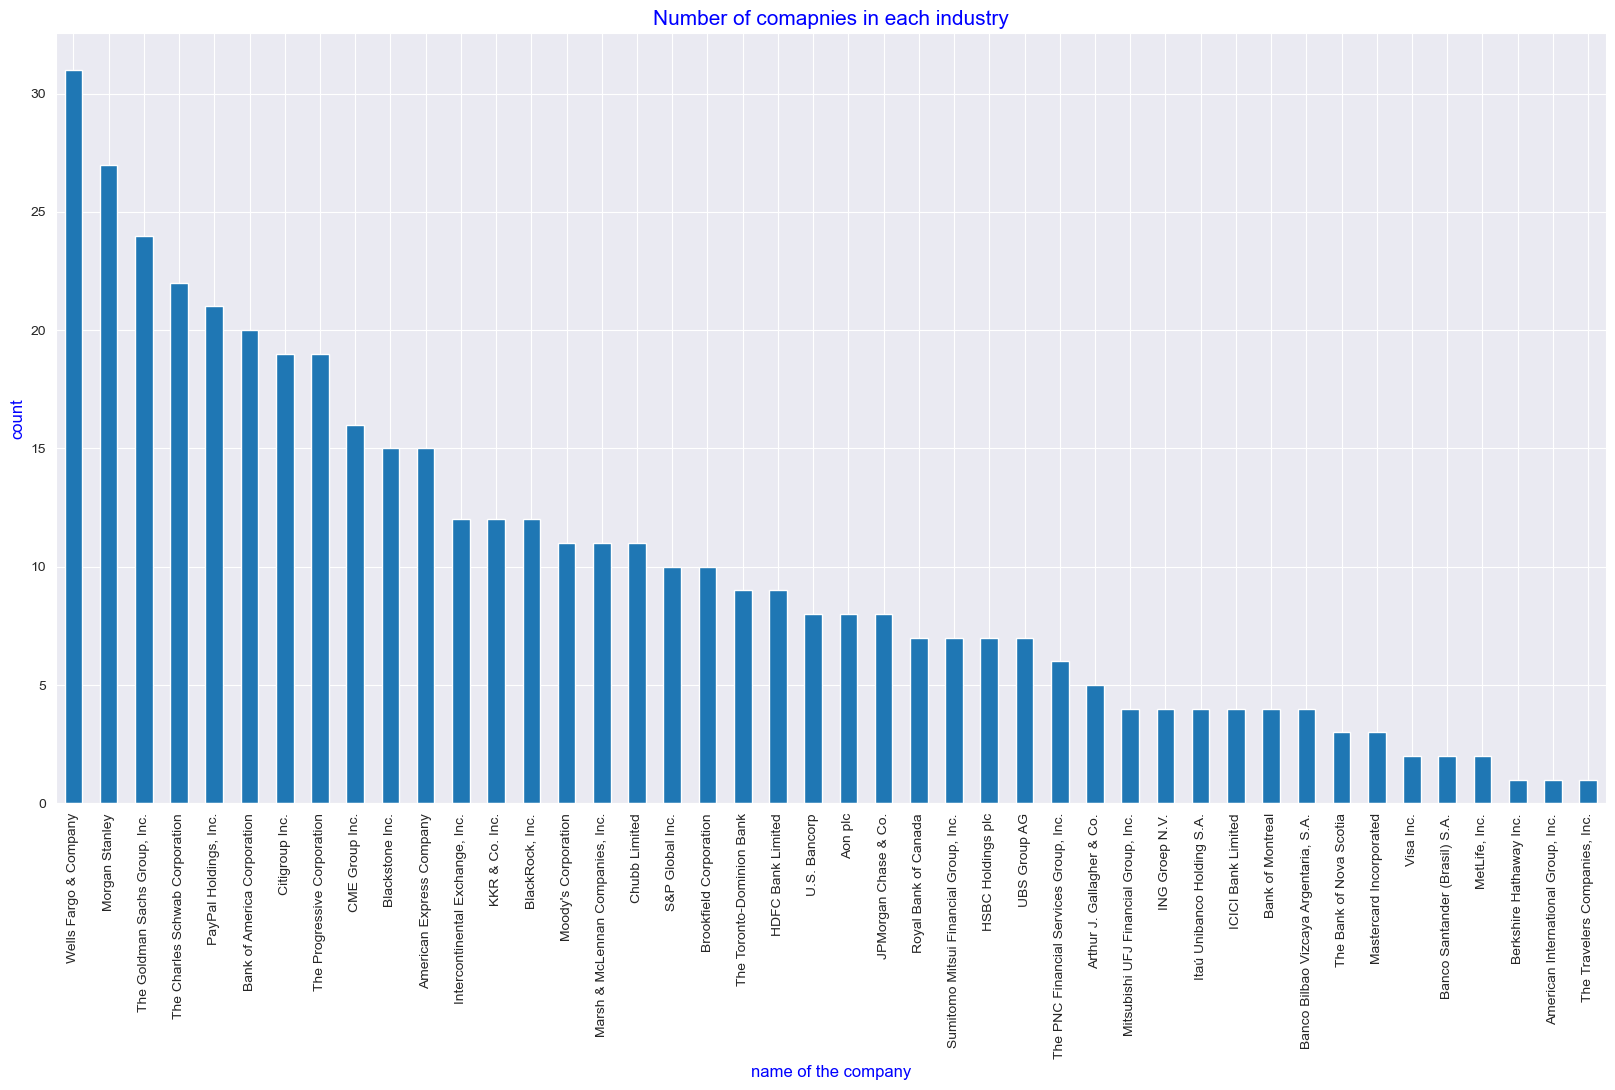

In [30]:
# no of companies

sns.set_style('darkgrid')
data['Name'].value_counts().plot(kind='bar',figsize=(20,10))
plt.title('Number of comapnies in each industry',fontsize=15,c='b')
plt.xlabel('name of the company',fontsize = 12,c='b')
plt.ylabel('count',fontsize=12,c='b')
plt.xticks(rotation=90)
plt.show();

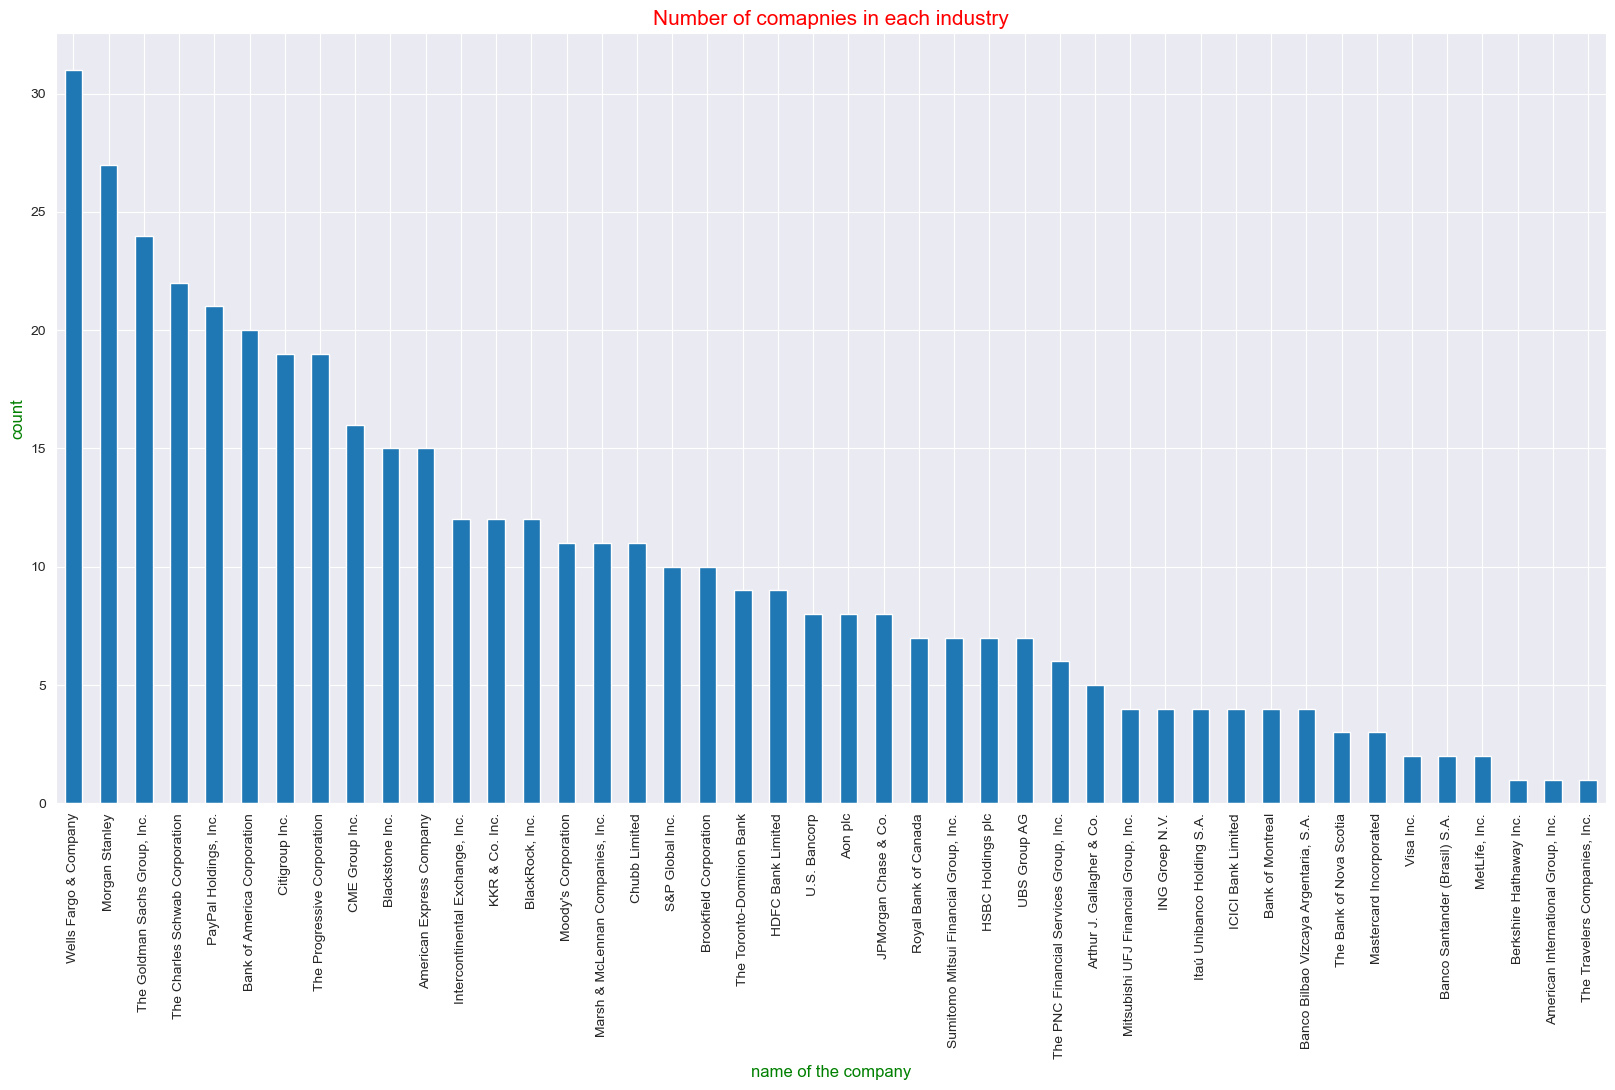

In [80]:
# no of companies

data['Name'].value_counts().plot(kind='bar',figsize=(20,10))
plt.title('Number of comapnies in each industry',fontsize=15,c='r')
plt.xlabel('name of the company',fontsize = 12,c='g')
plt.ylabel('count',fontsize=12,c='g')
plt.xticks(rotation=90)
plt.show();

In [32]:
data['market cap'].dtype

dtype('O')

In [51]:
data['market cap'] = data['market cap'].replace('B', 'e9',regex = True)
data['market cap'] = data['market cap'].astype(float)
sym_marketcap = data.groupby('Name')['market cap'].sum().sort_values(ascending=False)
sym_marketcap


Name
Wells Fargo & Company                     4.840466e+12
Bank of America Corporation               4.376324e+12
Morgan Stanley                            3.027912e+12
JPMorgan Chase & Co.                      2.814763e+12
The Goldman Sachs Group, Inc.             2.144700e+12
The Charles Schwab Corporation            1.919144e+12
Citigroup Inc.                            1.800606e+12
American Express Company                  1.655892e+12
PayPal Holdings, Inc.                     1.520853e+12
The Progressive Corporation               1.504761e+12
Blackstone Inc.                           1.483577e+12
BlackRock, Inc.                           1.181366e+12
S&P Global Inc.                           1.148599e+12
HDFC Bank Limited                         1.135607e+12
Mastercard Incorporated                   1.078300e+12
CME Group Inc.                            1.072564e+12
HSBC Holdings plc                         1.058249e+12
The Toronto-Dominion Bank                 1.007184e+12
Marsh

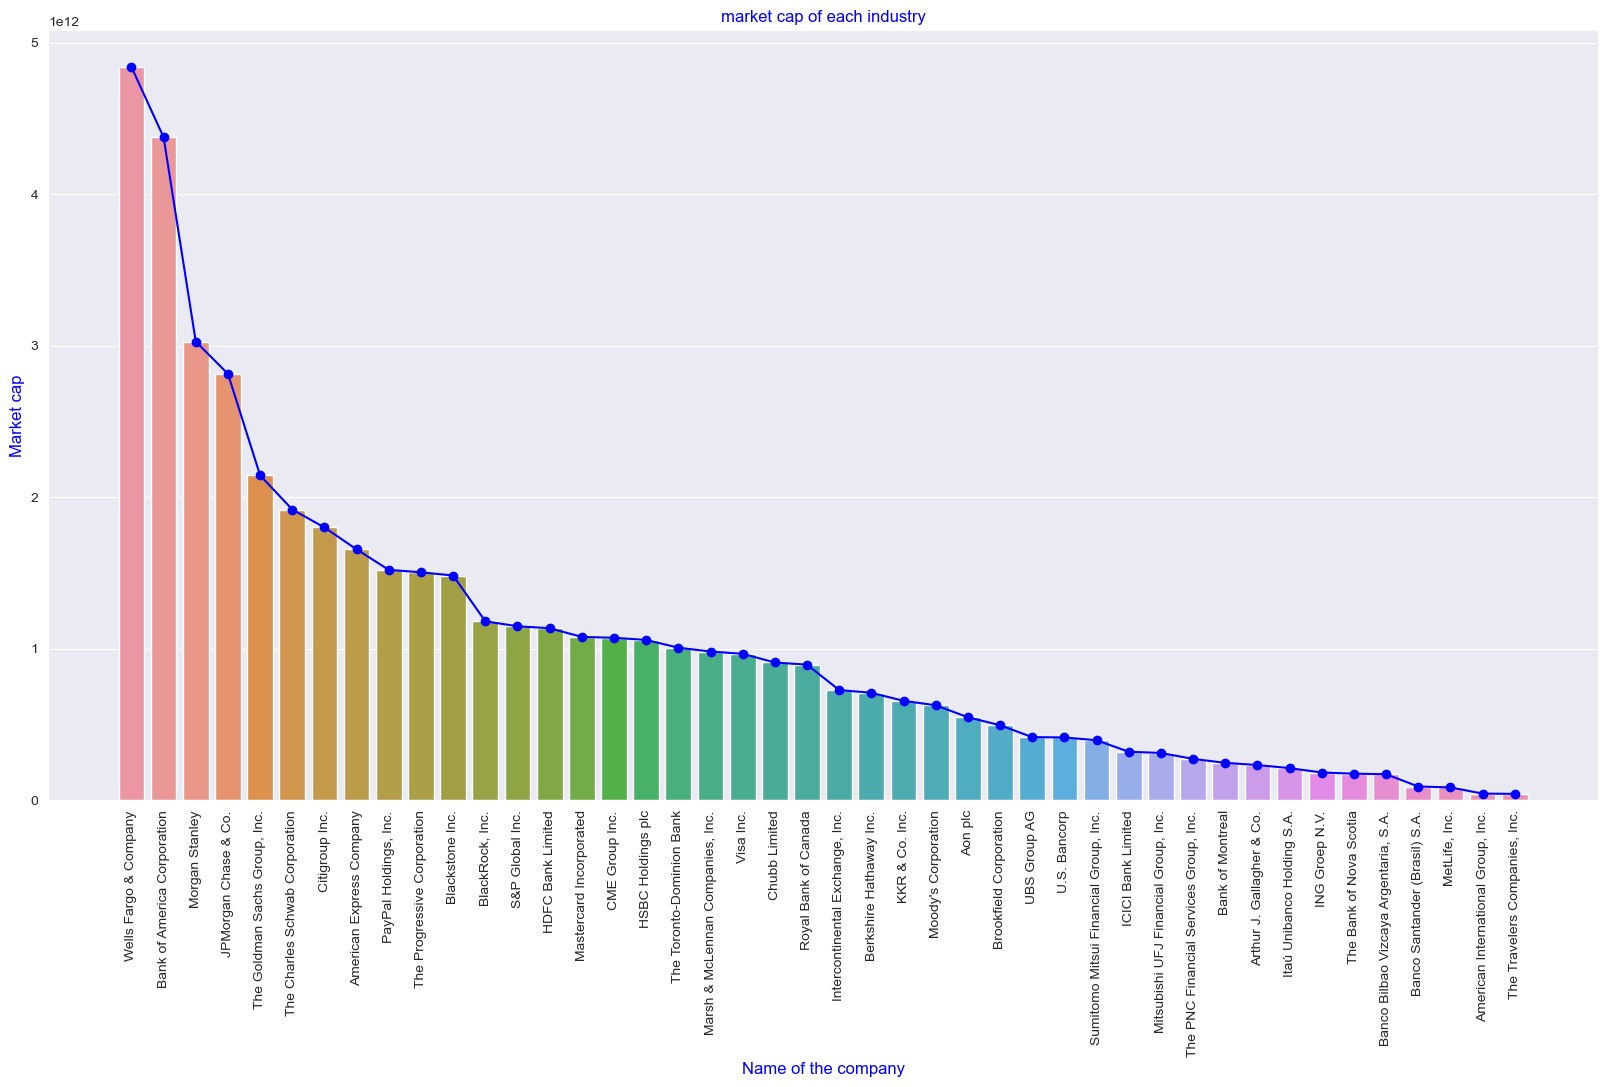

In [55]:
# market cap of each industry

plt.figure(figsize=(20, 10))
sns.barplot(x=sym_marketcap.index,y=sym_marketcap.values)
plt.plot(sym_marketcap.index,sym_marketcap.values,marker='o',color='b')
plt.title('market cap of each industry',fontsize=12,c='b')
plt.xlabel('Name of the company',fontsize=12,c='b')
plt.ylabel('Market cap',fontsize = 12, c='b')
plt.xticks(rotation=90)
plt.show();

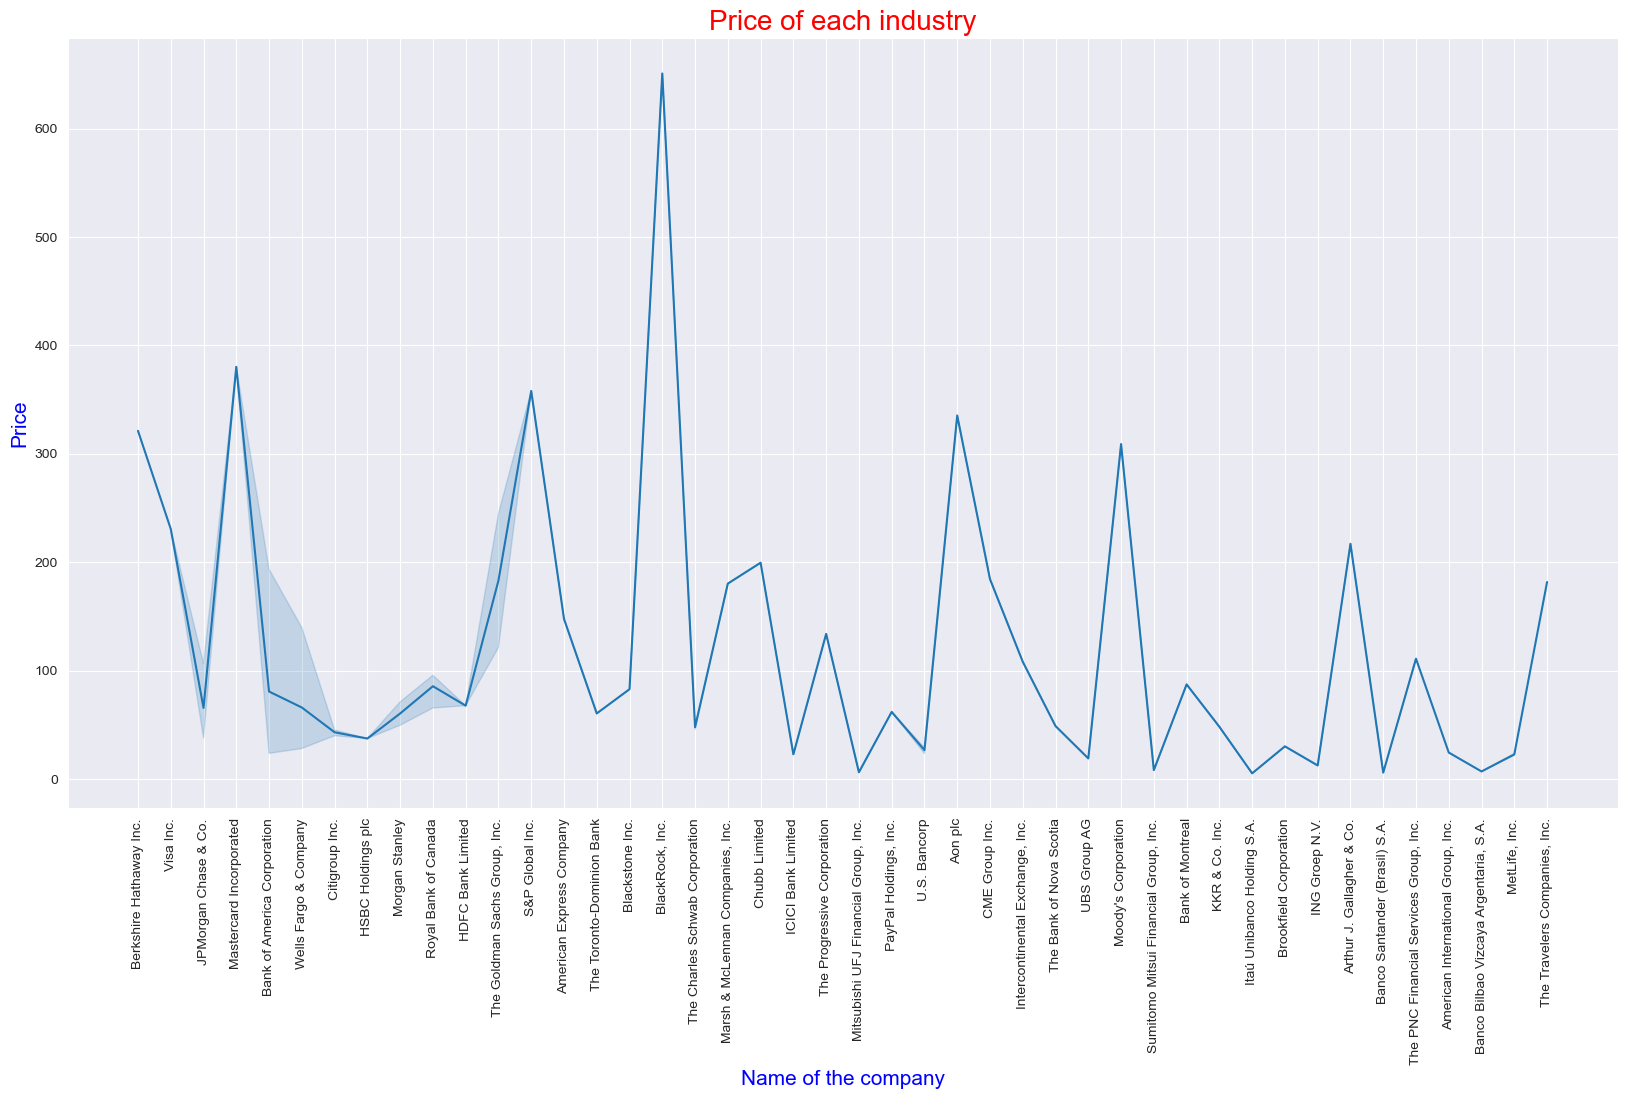

In [78]:
data['Price'] = data['Price'].replace(',','')
data['Price'] = data['Price'].astype(float)
plt.figure(figsize=(20,10))
sns.lineplot(x='Name',y='Price',data=data)
plt.title('Price of each industry',fontsize=20,c='r')
plt.xlabel('Name of the company',fontsize=15,c='b')
plt.ylabel('Price',fontsize=15,c='b')
plt.xticks(rotation=90)
plt.show()

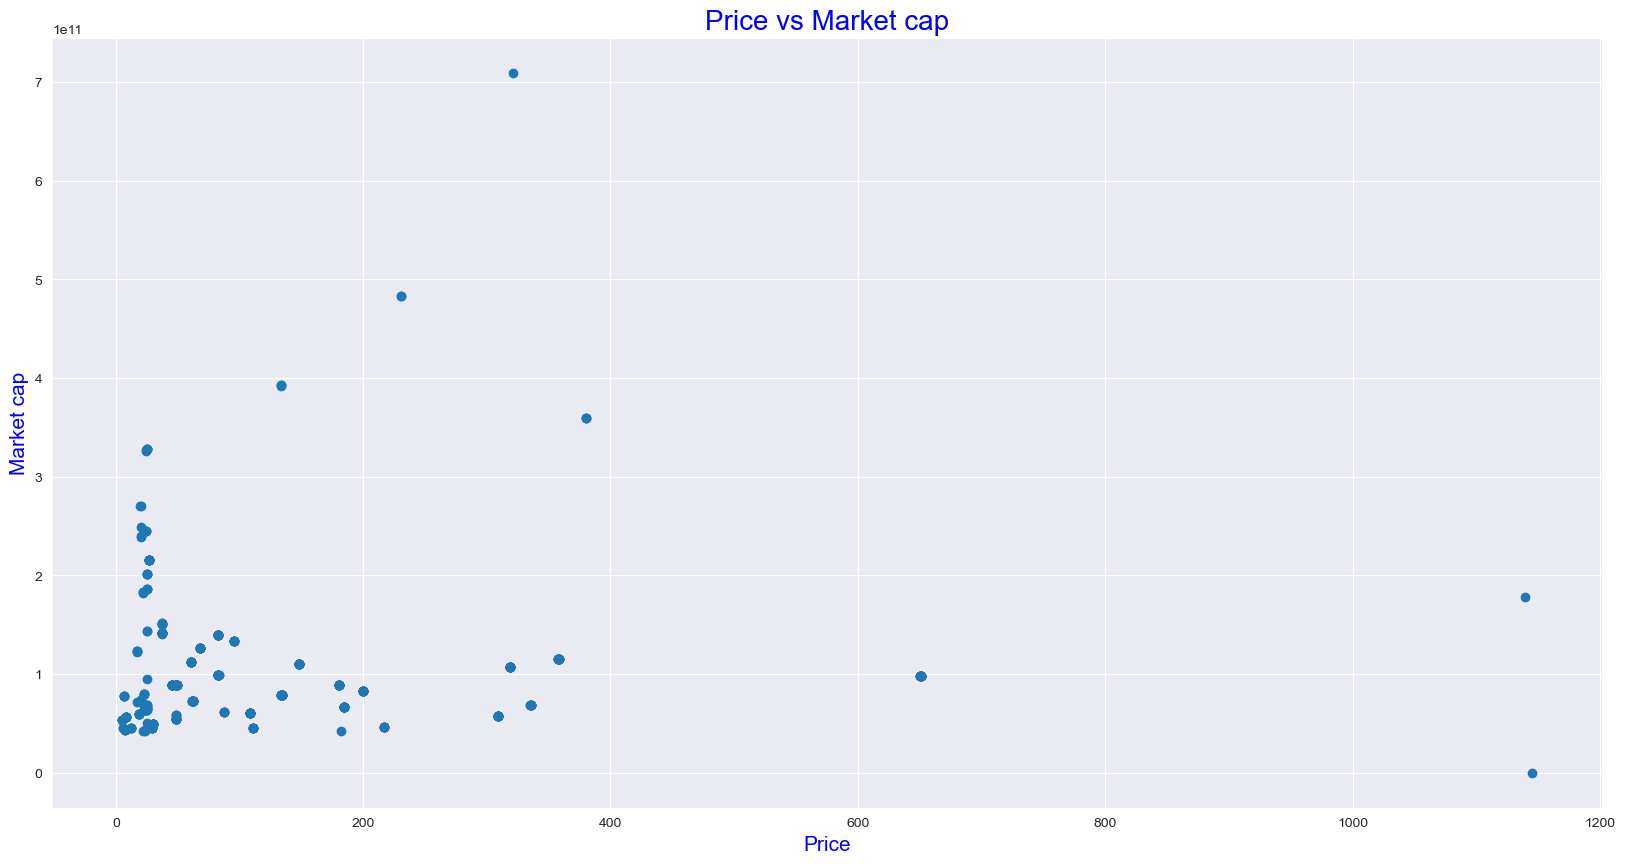

In [65]:
# Price vs Market price
plt.figure(figsize=(20,10))
plt.scatter(x='Price',y='market cap',data=data)
plt.title('Price vs Market cap',fontsize=20,c='b')
plt.xlabel('Price',fontsize=15,c='b')
plt.ylabel('Market cap',fontsize=15,c='b')
plt.show();

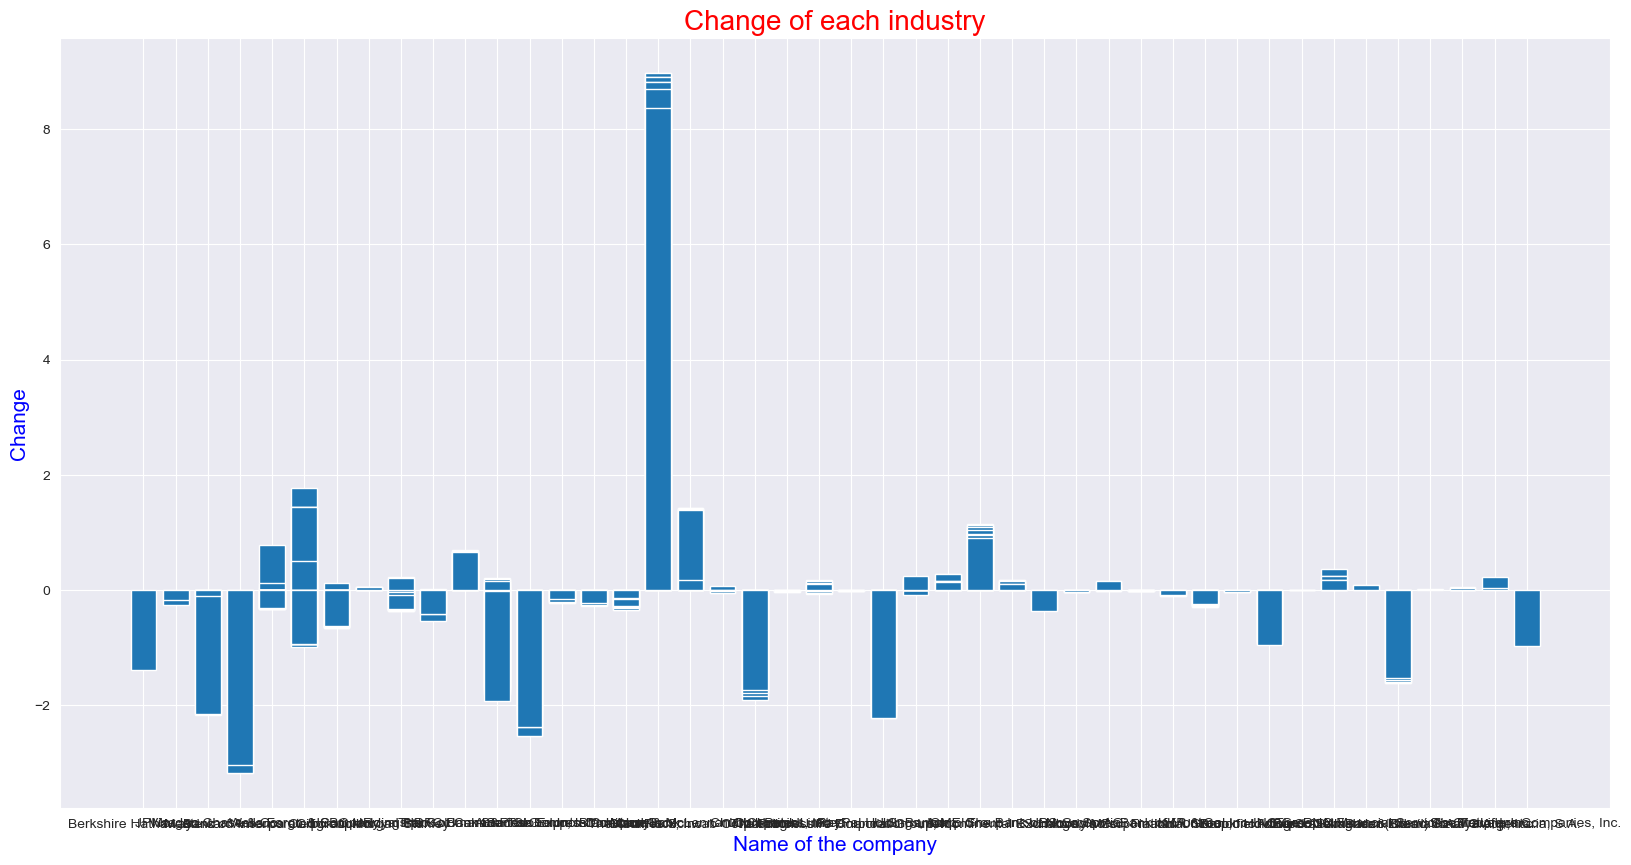

In [74]:
# Change of each industry

plt.figure(figsize=(20,10))
plt.bar(x='Name', height='Change',data=data)
plt.title('Change of each industry',fontsize=20,c='r')
plt.xlabel('Name of the company',fontsize=15,c='b')
plt.ylabel('Change',fontsize=15,c='b')
plt.show();

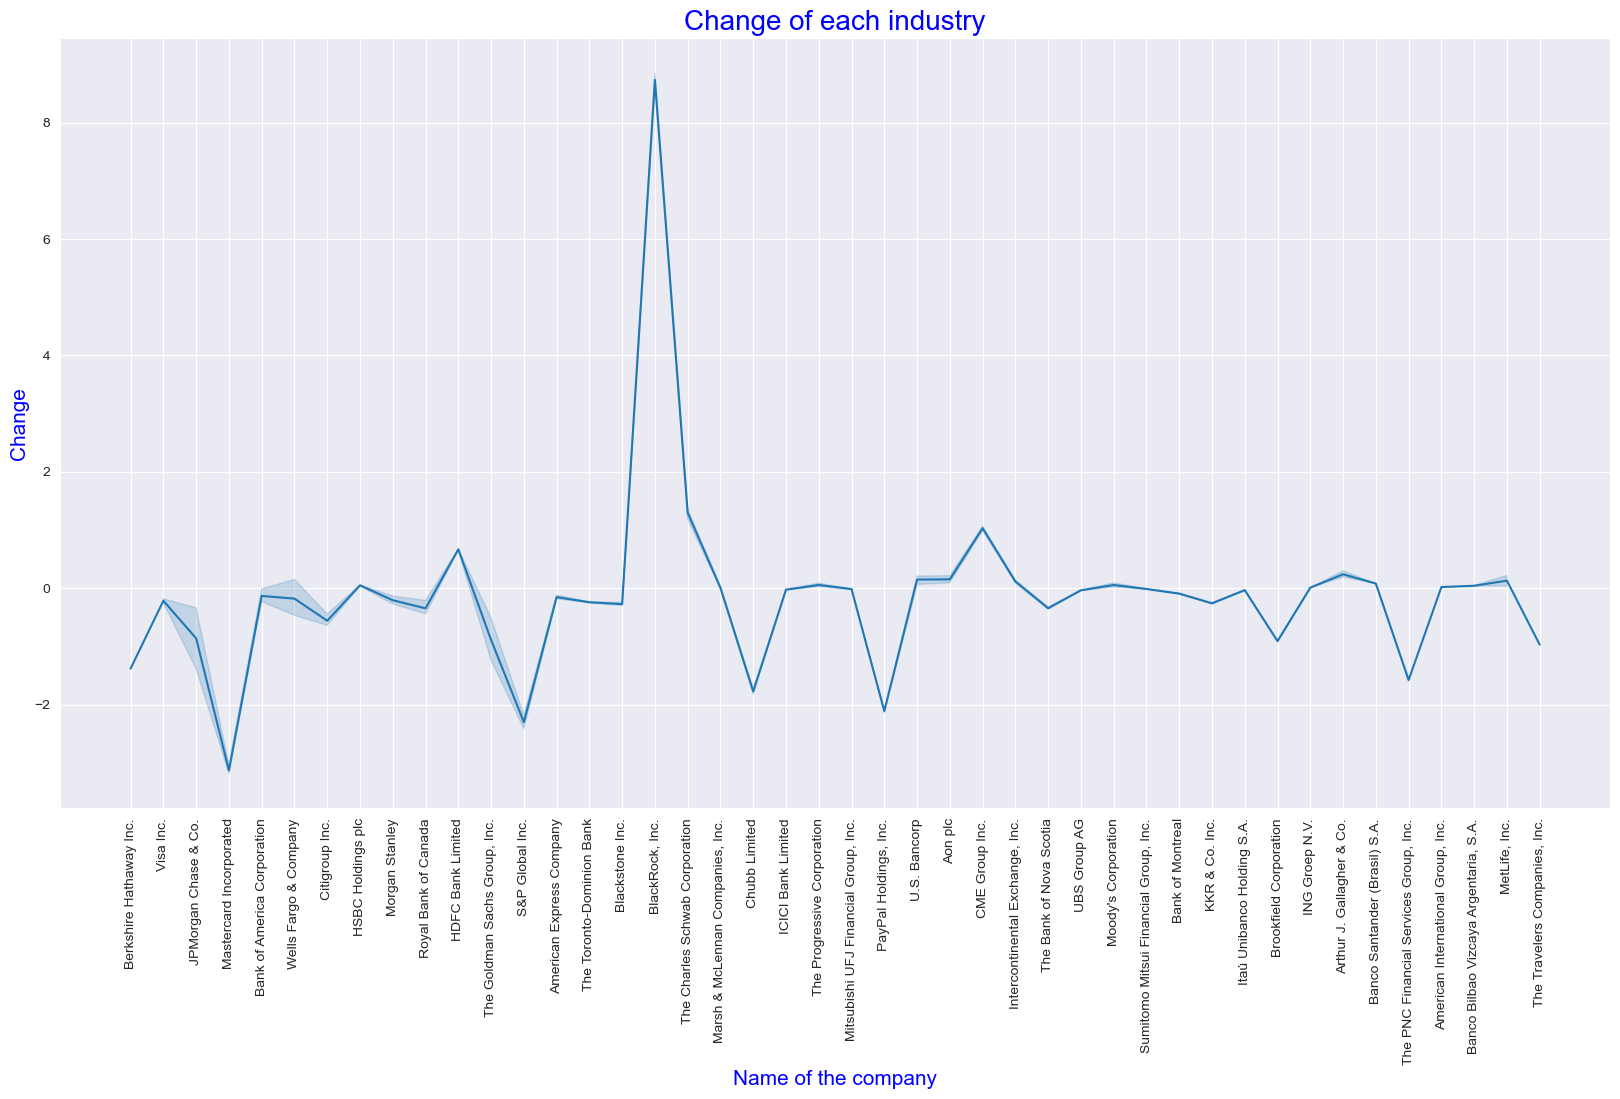

In [72]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Name', y='Change',data=data)
plt.title('Change of each industry',fontsize=20,c='b')
plt.xlabel('Name of the company',fontsize=15,c='b')
plt.ylabel('Change',fontsize=15,c='b')
plt.xticks(rotation=90)
plt.show();

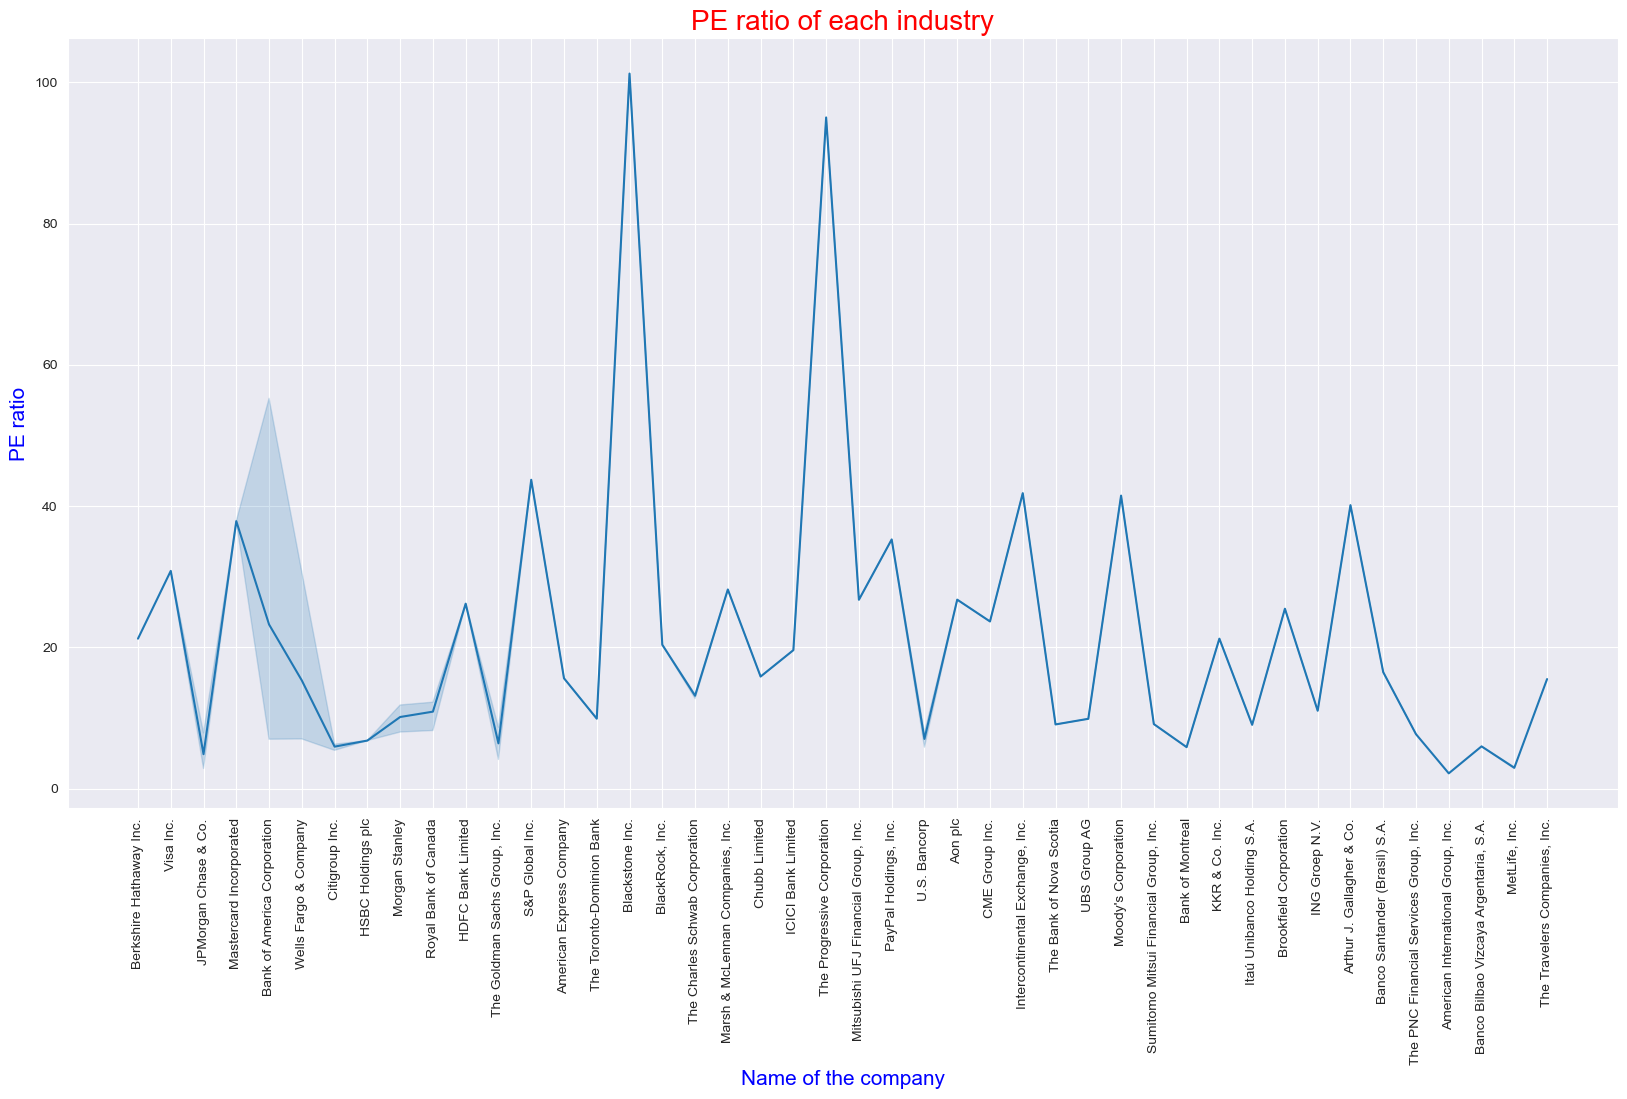

In [73]:
# PE ratio of each industry

plt.figure(figsize=(20,10))
sns.lineplot(x='Name', y='PE_ratio',data=data)
plt.title('PE ratio of each industry',fontsize=20,c='r')
plt.xlabel('Name of the company',fontsize=15,c='b')
plt.ylabel('PE ratio',fontsize=15,c='b')
plt.xticks(rotation=90)
plt.show();